In [1]:
import cv2
import sys
import numpy as np
from os.path import join
import matplotlib.pyplot as plt

PATH = 'C:\\Users\\marco\\My Drive\\ComputerScience\\Visão Computacional\\images\\Skol'

In [2]:
# caso haja mudanças em BeerClassification, reload permite atualizar sem restart do kernel
import projeto_helper
from projeto_helper import BeerClassification

import importlib
importlib.reload(projeto_helper)

<module 'projeto_helper' from 'D:\\cs\\projetoVC\\projeto_helper.py'>

In [3]:
bc = BeerClassification(PATH, ['0', '1', '2'])
query_img = plt.imread(bc.imgs[0])
train_img = plt.imread(bc.imgs[210]) # 105 ou 210
# for i, label in enumerate(bc.labels):
#     print(i, label)

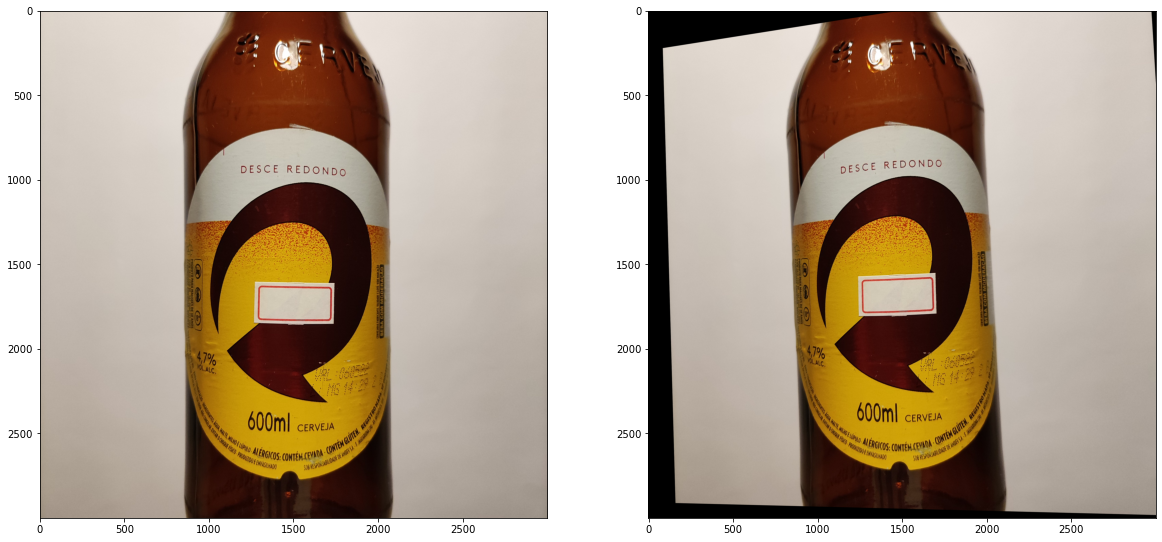

In [4]:
mask = plt.imread(join(PATH, 'mask0.jpg'))
query_img_m = cv2.bitwise_and(query_img, mask)

train_img_t = bc.transform(query_img_m, train_img)[0]

_, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].imshow(train_img)
axs[1].imshow(train_img_t)
plt.show()

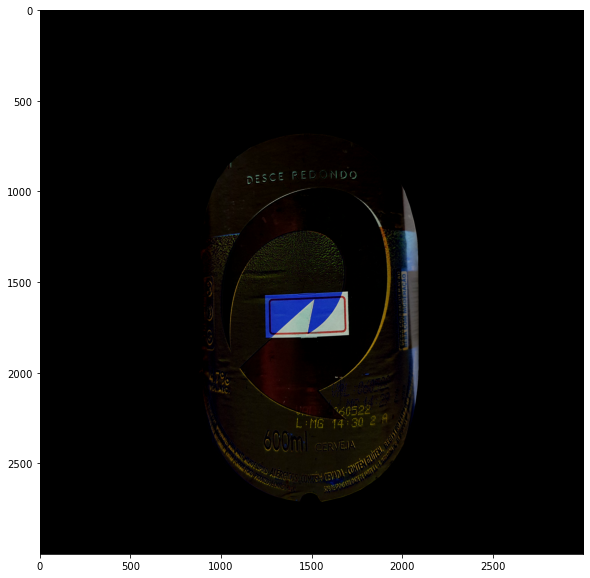

In [5]:
img_diff = cv2.subtract(train_img_t, query_img_m)
img_diff = cv2.bitwise_and(img_diff, mask)
plt.figure(figsize=(10, 10))
plt.imshow(img_diff)
plt.show()

In [6]:
img_diff.shape

(3000, 3000, 3)